# Inspecting the Stool Image Dataset

This notebook counts the number of data points (images) in each class and visualizes the distribution.

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Path to the unzipped dataset
DATA_DIR = "../datasets/data-BSS"

# List class folders
class_folders = sorted([d for d in os.listdir(DATA_DIR) if os.path.isdir(os.path.join(DATA_DIR, d))])

In [4]:
def remove_ds_store_files(root_dir):
    for subdir, _, files in os.walk(root_dir):
        for f in files:
            if f == '.DS_Store':
                full_path = os.path.join(subdir, f)
                os.remove(full_path)
                print(f"Removed: {full_path}")

# Run this once before DataLoader is created
remove_ds_store_files('data')

In [5]:
# Count images per class
class_counts = {}
for class_name in class_folders:
    class_path = os.path.join(DATA_DIR, class_name)
    # Count only files (ignore hidden/system files)
    files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
    class_counts[class_name] = len(files)

In [6]:
# Create a DataFrame for display
df_counts = pd.DataFrame.from_dict(class_counts, orient='index', columns=['Count'])
df_counts.index.name = "Class"
df_counts = df_counts.reset_index()

# Display the counts
print("Total number of datapoints:", df_counts['Count'].sum())
print()
print("Number of images per class:")
df_counts

Total number of datapoints: 971

Number of images per class:


,Class,Count
0,type-1,65
1,type-2,92
2,type-3,323
3,type-4,326
4,type-5,39
5,type-6,42
6,type-7,84


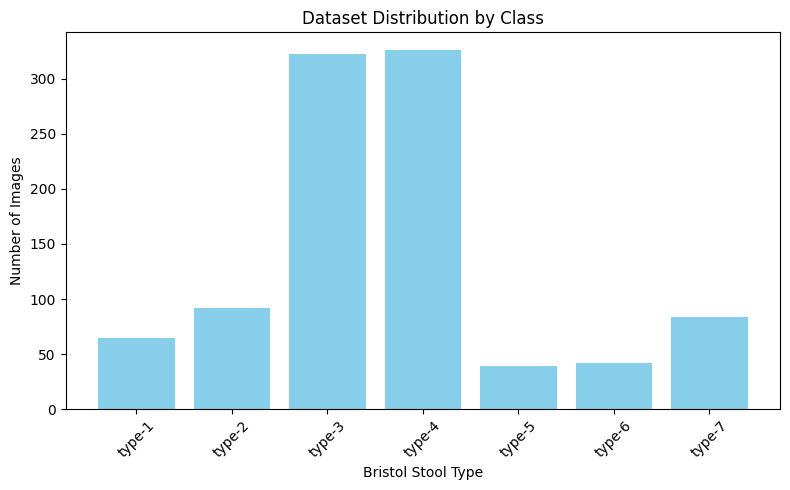

In [7]:
# Plot the distribution
plt.figure(figsize=(8, 5))
plt.bar(df_counts['Class'], df_counts['Count'], color='skyblue')
plt.xlabel("Bristol Stool Type")
plt.ylabel("Number of Images")
plt.title("Dataset Distribution by Class")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()